In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

In [123]:
Nt = 11
Nx = 6
Ny = 6

x = np.linspace(0,1,Nx)
y = np.linspace(0,1,Nx)
t = np.linspace(0,1,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

alpha = 1
beta = 1

lambda_ = (alpha*deltat)/deltax**2
mu_ = (beta*deltat)/deltay**2

print(deltat, lambda_,mu_)

0.1 2.4999999999999996 2.4999999999999996


In [124]:
def Ti(x,y):
    return np.sin(np.pi*(x+y))

In [125]:
def InitT():
    
    T = np.zeros((Nt,Nx,Ny))
    
    T[0,:,:] = Ti(x,y)
    
    T[:,:,0] = np.sin(np.pi*y)
    T[:,:,-1] = np.sin(np.pi*(1+y))
    T[:,0,:] = np.sin(np.pi*x)
    T[:,-1,:] = np.sin(np.pi*(1+x))
    
    return T

<IPython.core.display.Javascript object>


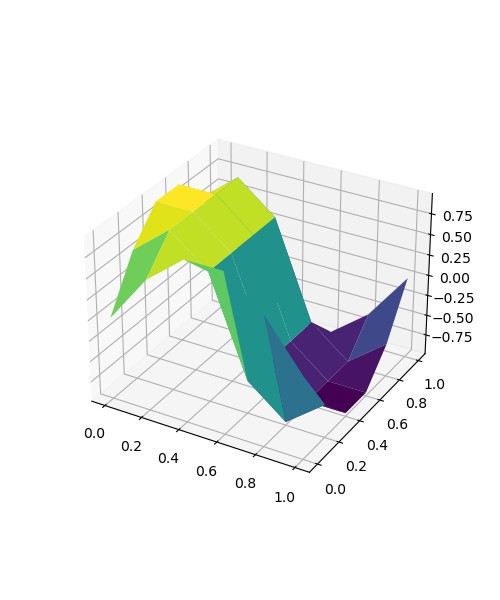

In [128]:
T = InitT()

fig1 = plt.figure(figsize=(5,6))
ax1 = fig1.add_subplot(111, projection='3d')

X1,Y1 = np.meshgrid(x,y)

ax1.plot_surface(X1,Y1,T[0,:,:],cmap='viridis')


In [129]:
def GetSolution():
    
    for l in tqdm(range(1,len(t))):
        
        T[l,:,0] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*y)
        T[l,:,-1] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*(1+y))
        T[l,0,:] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*x)
        T[l,-1,:] = np.exp(-2*(np.pi**2)*t[l]) * np.sin(np.pi*(1+x))
        
        
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                T[l,i,j] = (1-2*lambda_-2*mu_)*T[l-1,i,j] + \
                lambda_*(T[l-1,i+1,j] + T[l-1,i-1,j]) + \
                mu_*(T[l-1,i,j+1] + T[l-1,i,j-1])
                

In [130]:
GetSolution()

100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 9957.99it/s]


In [131]:
T[-1,:,:]

array([[ 0.00000000e+00,  1.57249483e-09,  2.54435008e-09,
         2.54435008e-09,  1.57249483e-09,  3.27628288e-25],
       [ 1.57249483e-09,  6.06656497e+08,  5.66410476e+08,
        -1.06807423e+09, -9.16701750e+08, -1.57249483e-09],
       [ 2.54435008e-09, -5.66368223e+08,  4.61301486e+08,
         3.49946826e+08,  1.06774725e+09, -2.54435008e-09],
       [ 2.54435008e-09, -1.06774725e+09, -3.49946826e+08,
        -4.61301486e+08,  5.66368223e+08, -2.54435008e-09],
       [ 1.57249483e-09,  9.16701750e+08,  1.06807423e+09,
        -5.66410476e+08, -6.06656497e+08, -1.57249483e-09],
       [ 3.27628288e-25, -1.57249483e-09, -2.54435008e-09,
        -2.54435008e-09, -1.57249483e-09, -6.55256575e-25]])

<IPython.core.display.Javascript object>


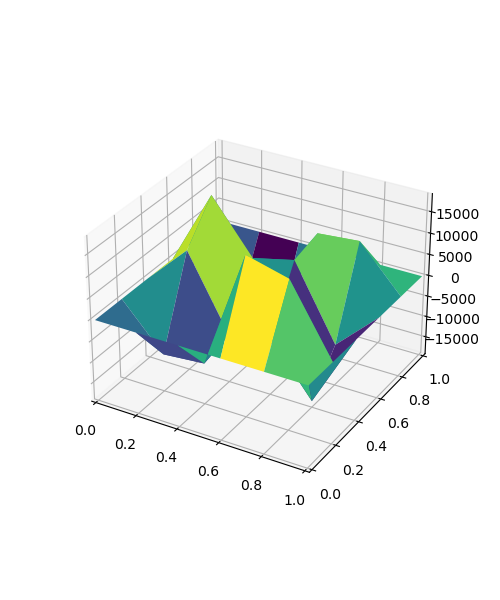

In [132]:
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111, projection='3d')

X,Y = np.meshgrid(x,y)

def init():
    
    
    ax.set_xlim3d(0,1)
    ax.set_ylim3d(0,1)
    #ax.set_zlim3d(0,20)

def Update(i):

    ax.clear()
    init()
    
    ax.plot_surface(X,Y,T[i,:,:],cmap='viridis')
    
Animation = animation.FuncAnimation(fig,Update,frames=len(t),init_func=init)